# PISA DATA EXPLORATION
## by Sinem Mutluer

## Investigation Overview

> I'm interested in which variables have more affect on students' skills in positive way or negative way.I also want to look at from which countries students attended Pisa.
I think internet usage, teacher change and teaching type may affect students' skills. I also want to look at which gender is more tend to the skills.



## Dataset Overview

> I used Pisa 2012 Data which provided by Udacity for this project. PISA is abbrevation of Programme for International Student Assessment. PISA is a worldwide study developed by the Organisation for Economic Co-operation and Development (OECD) which examines the skills of 15-year-old school students around the world. The study assesses students’ mathematics, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of education systems.
There are 485490 students in the dataset. There were 636 columns in the dataset and lots of them had detailed information that will not be used for this project so i removed them and create new dataframe.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

In [5]:
# load in the dataset into a pandas dataframe

Pisa = pd.read_csv('pisa2012.csv', encoding= 'ISO-8859-1')

In [6]:
# Creating new dataframe with the columns that will be used for analysis

pisa_new = Pisa.filter(['STIDSTD', 'CNT', 'OECD', 'ST04Q01', 'AGE','ST01Q01', 'PV1MATH', 'PV1READ', 'PV1SCIE', 'W_FSTUWT',
                        'GRADE','INTMAT', 'ST35Q06', 'ST55Q01', 'ST55Q02', 'ST55Q03', 'OUTHOURS', 'STUDREL', 'ST43Q04',
                       'ST87Q07', 'BELONG', 'ST46Q06', 'EC08Q01', 'EC08Q02', 'EC08Q03', 'EC08Q04', 'ST79Q07', 'IC10Q08', 
                        'IC10Q09', 'IC01Q04'])


# Renaming columns

pisa_final = pisa_new.rename(columns = {'STIDSTD' : 'Student ID','CNT' : 'Country', 'ST04Q01': 'Gender', 'AGE': 'Age',
                                        'ST01Q01': 'International Grade', 'PV1MATH': 'Math', 'PV1READ': 'Reading', 
                                        'PV1SCIE': 'Science', 'W_FSTUWT': 'Final Student Weight','GRADE': 'Comparison with Model Grade'
                                        ,'INTMAT': 'Math Interest', 'ST35Q06': 'Parents Like Math', 'ST55Q01': 'OofS_Lang',
                                        'ST55Q02': 'OofS_Math', 'ST55Q03': 'OofS_Science', 'OUTHOURS': 'OofS_Study Time', 
                                        'STUDREL': 'Teacher_Student Relationship', 'ST43Q04': 'Different_Teachers',
                                        'ST87Q07': 'Feel Happy at School', 'BELONG': 'Belonging to School', 'ST46Q06': 'Student no in lang. class', 
                                        'EC08Q01': 'Reading act._lang.', 'EC08Q02': 'Watching TV act._lang.', 
                                        'EC08Q03': 'Internet act._lang.', 'EC08Q04': 'Writing act._lang.',
                                        'ST79Q07': 'Small Groups', 'IC10Q08':'Homework', 'IC10Q09': 'Group Work', 'IC01Q04': 'Internet_Connection' })

## How is the gender distribution?


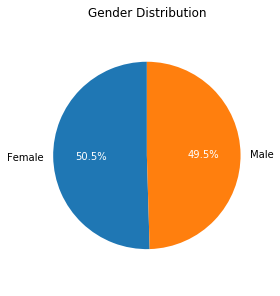

In [7]:
# Plotting gender to see the distributon

fig1, ax1 = plt.subplots(1, 1, figsize=(4, 4), sharex=True)
patches, texts, autotexts = ax1.pie(pisa_final.Gender.value_counts(), 
                                    labels=['Female','Male'],
                                    autopct='%1.1f%%',
                                    startangle=90
                                   );
    
for text in autotexts:
    text.set_color('white')
    
ax1.axis('equal');
plt.tight_layout();
plt.title('Gender Distribution')
plt.show();


Female and male student counts are close to each other so it's possible to have a sensible analyze about gender.

## From which countries students attended more?

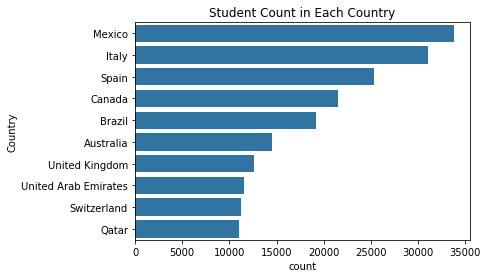

In [8]:
# Let's look at the country distribution of students

base_color = sb.color_palette()[0]
sb.countplot(data = pisa_final, y = 'Country', color = base_color, order=pisa_final['Country'].value_counts().index[:10])
plt.title('Student Count in Each Country')
plt.ylabel('Country');

Mexico,Italy,Spain,Canada,Brazil have students over 15000.They have the biggest part of the data

## How are the skills' score distribution?

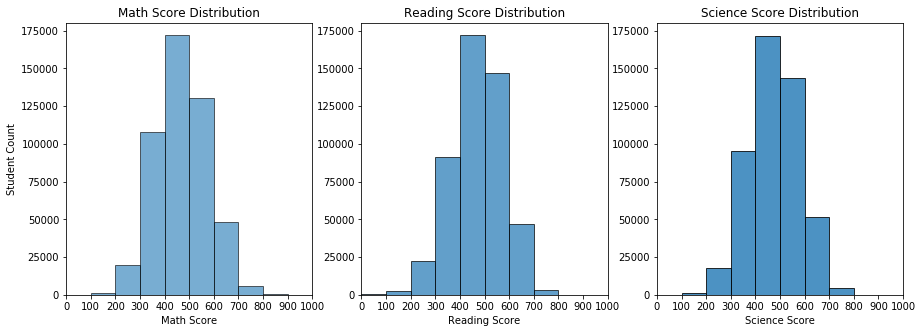

In [9]:
# Let' look at the skill scores distribution

plt.figure(figsize = [15, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(pisa_final['Math'], bins = bins_hist, ec = 'black', alpha = 0.60);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Student Count')
plt.title("Math Score Distribution");

plt.subplot(1, 3, 2)
plt.hist(pisa_final['Reading'], bins = bins_hist, ec = 'black', alpha = 0.70);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.title("Reading Score Distribution");

plt.subplot(1, 3, 3)
plt.hist(pisa_final['Science'], bins = bins_hist, ec = 'black', alpha = 0.80);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score')
plt.title("Science Score Distribution");

- All scores have normal distribution.
- Lots of students have scores between 400 and 600. Genaral trend of scores for all the skills is between 300 - 700.
- There are some students who have reading score under the point of 100 and math score over the point of 800.But the number of those students is low.

## Is there any relationship between internet usage and student skills? 

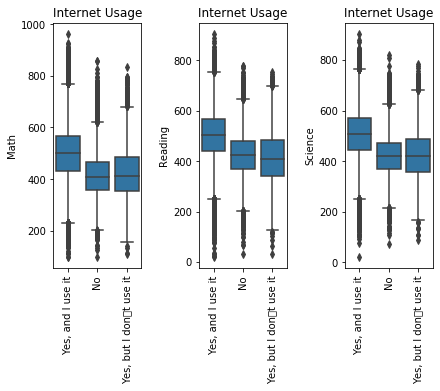

In [10]:
# Let's see is there any relationship between internet usage and student skills.

# Dropping nan rows from Internet Connection column

pisa_final['Internet_Connection'] = pisa_final['Internet_Connection'].fillna(0)
pisa_filtered = pisa_final[pisa_final['Internet_Connection'] != 0]

# Putting some space between graphs

fig, axes = plt.subplots(nrows=4, ncols=4)
fig.tight_layout() 

# Plotting Math

plt.subplot(1, 3, 1)
sb.boxplot( data= pisa_filtered, x='Internet_Connection', y= 'Math', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Internet Usage');

# Plotting Reading

plt.subplot(1, 3, 2)
sb.boxplot( data= pisa_filtered, x='Internet_Connection', y= 'Reading', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Internet Usage');

# Plotting Science

plt.subplot(1, 3, 3)
sb.boxplot( data= pisa_filtered, x='Internet_Connection', y= 'Science', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Internet Usage');



Internet usage have some affect on skills. We can say the students who use internet for research can get more points on all skills.

## Which gender is more tend to the skills?

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 3600x1440 with 0 Axes>

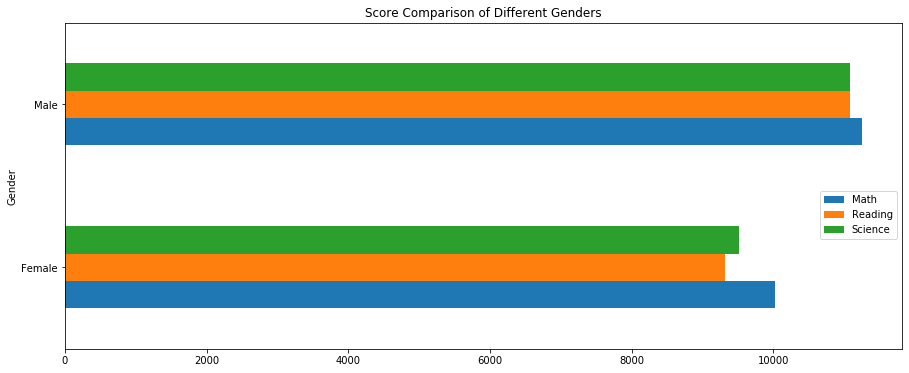

In [11]:
# Let's see which gender is more tend to the skills.

plt.figure(figsize = [50, 20])
res = pisa_final.groupby(['Gender']).var()[['Math', 'Reading', 'Science']]
ax = res.plot.barh(figsize=(15,6));
ax.legend(bbox_to_anchor=(1, 0.5))
plt.title('Score Comparison of Different Genders')
plt.xticks(rotation='horizontal')

Male students more succesful on all skills.

## Does teacher change have an effect on student scores?

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 3600x1440 with 0 Axes>

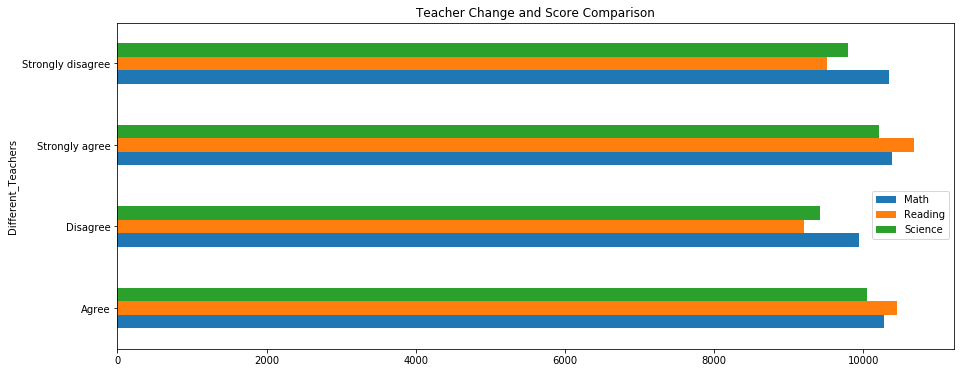

In [12]:
# Let's see if teacher change has an effect on student scores.

pisa_final['Different_Teachers'] = pisa_final['Different_Teachers'].fillna(0)
pisa_filtered1 = pisa_final[pisa_final['Different_Teachers'] != 0]

# Plotting

plt.figure(figsize = [50, 20])
res = pisa_filtered1.groupby(['Different_Teachers']).var()[['Math', 'Reading', 'Science']]
ax = res.plot.barh(figsize=(15,6));
ax.legend(bbox_to_anchor=(1.0, 0.5))
plt.title('Teacher Change and Score Comparison')
plt.xticks(rotation='horizontal')

We can't exactly say that teacher change have an affect on math score. But when it comes to science and reading, we can see that if theacher changes, scores go over. 

## How teaching types affect student skills?

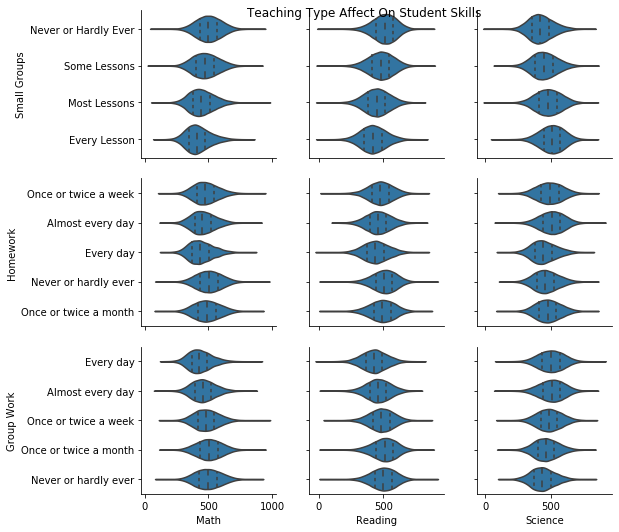

In [13]:
# Let's look at teaching type affect on student skills.

g = sb.PairGrid( data= pisa_final, x_vars = ['Math', 'Reading', 'Science'], 
                y_vars = ['Small Groups', 'Homework', 'Group Work']) 

g.map(sb.violinplot, inner = 'quartile')

g.fig.suptitle("Teaching Type Affect On Student Skills");

Explanation of this visalization is in the next slide.

- Math scores are better when students study individual. Students learn math more when they are in the class.
- Work with groups doesn't the best way to improve reading skill. Homeworks may create good affect on skills if they are not given by teachers very frequently.
- Both small group and large group works are very useful for science. Homeworks also increase their skills if they are not given every day. Everyone needs break sometimes.

# THANK YOU